In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)


In [3]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.ix['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)

/Users/LiuQianKevin/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,AAPL,MSFT,^GSPC
2000-01-03,3.997768,58.28125,1455.219971
2000-01-04,3.660714,56.31250,1399.420044
2000-01-05,3.714286,56.90625,1402.109985
2000-01-06,3.392857,55.00000,1403.449951
2000-01-07,3.553571,55.71875,1441.469971
2000-01-10,3.491071,56.12500,1457.599976
2000-01-11,3.312500,54.68750,1438.560059
2000-01-12,3.113839,52.90625,1432.250000
2000-01-13,3.455357,53.90625,1449.680054
2000-01-14,3.587054,56.12500,1465.150024


In [4]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
adj_close = panel_data.ix['Adj Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
adj_close = adj_close.fillna(method='ffill')

In [5]:
all_weekdays

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=4435, freq='B')

In [6]:
adj_close.head(7)

,AAPL,MSFT,^GSPC
2000-01-03,3.596616,38.903194,1455.219971
2000-01-04,3.293384,37.589046,1399.420044
2000-01-05,3.341579,37.985374,1402.109985
2000-01-06,3.052405,36.712940,1403.449951
2000-01-07,3.196992,37.192707,1441.469971
2000-01-10,3.140763,37.463867,1457.599976
2000-01-11,2.980111,36.504345,1438.560059


In [7]:
adj_close.describe()

,AAPL,MSFT,^GSPC
count,4435.000000,4435.000000,4435.000000
mean,35.191288,25.864070,1375.881598
std,37.933006,10.338320,361.308452
min,0.843106,12.171559,676.530029
25%,3.215066,19.171926,1126.334961
50%,17.490602,22.247644,1294.869995
75%,64.533600,27.108754,1507.724976
max,126.941574,62.543003,2271.719971


In [8]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = adj_close.ix[:, 'MSFT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

/Users/LiuQianKevin/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


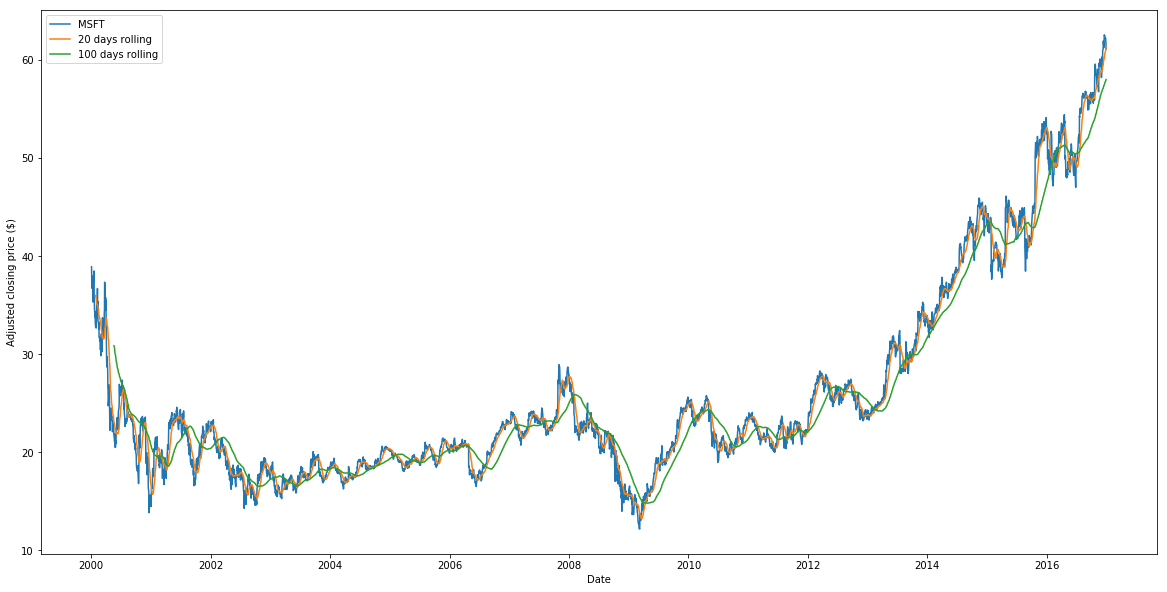

In [9]:
plt.show()

In [18]:
class PointNFigure:
    '''Draw Point and figure chart'''
    
    def __init__(self, stock = None):
        self.stock = stock;
        
    def sign(self, val):
        '''Return sign of val'''
        if val < 0:
            return -1;
        else:
            return 1;
        
    def FindChange(self, box = 1, scale = 3):
        '''Return changes of points in the stock data'''
        TRIG = scale*box;
        START = int(self.stock[0]);
        changes = []

        for i in range(0,len(self.stock)):
            diff = int((self.stock[i] - START)/box);
            
            #if smaller than box continue;
            if diff == 0:
                continue;
            else:
                # if changes is empty, add starting point
                if len(changes) == 0:
                    changes.append(self.sign(diff));
                    
                # if different sign is the same as change[-1], change[-1] += diff
                # else check trig, if trig is on, append diff
                if diff * changes[-1] > 0:
                    changes[-1] += diff;
                else:
                    if abs(diff) < TRIG:
                        continue;
                    else:
                        changes.append(diff);
                        
                #update start
                START = START + diff*box;
        return changes

        
    def PlotPointNFigureChart(self, box = 1, scale = 3, save_figure = False):
        '''Function to plot Point and figure chart'''
        
        changes = self.FindChange(box, scale);
        # one way to force dimensions is to set the figure size:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_axes([.15, .15, .7, .7])

        symbol = {-1:'o',
               1:'x'}
        color={-1:'red',
                1:'green'}
        chgStart = self.stock[0];
        for ichg, chg in enumerate(changes):
            x = [ichg+1] * abs(chg)
            y = [chgStart + i * box * self.sign(chg) for i in range(abs(chg))] 
            
            chgStart += box * self.sign(chg) * (abs(chg)-2)
            ax.scatter(x, y,
                       marker=symbol[self.sign(chg)], color = color[self.sign(chg)],
                       s=30)   #<----- control size of scatter symbol

        ax.set_xlim(0, len(changes)+1)
        if save_figure:
            fig.savefig('pointandfigure.png')
        plt.show()
        
    def volume_by_price(self, box = 1, scale = 3, save_figure = False):
        changes = self.FindChange(box, scale);
        chgStart = self.stock[0];
        price_movement = {};
        for ichg, chg in enumerate(changes):
            for i in range(abs(chg)):
                value = chgStart + i * box * self.sign(chg);
                if price_movement.get(value) == None:
                    price_movement[value] = [0,0]
                index = (self.sign(chg) == 1);
                price_movement[value][index] += 1;
            chgStart += box * self.sign(chg) * (abs(chg)-2) 
        pos = []
        neg = []
        keys = []
        for key in price_movement.keys():
            keys.append(key);
            neg.append(price_movement[key][0])
            pos.append(price_movement[key][1])
        return [keys, pos, neg];

In [19]:
from IPython.html.widgets import *
msft_ = PointNFigure(stock = msft)
a = msft_.volume_by_price();

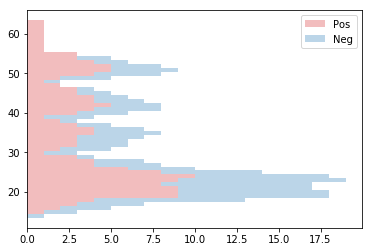

In [20]:
opacity = 0.3
width = 1
p1 = plt.barh(a[0], a[1], width, color='#d62728',alpha=opacity,)
p2 = plt.barh(a[0], a[2], width, left=a[1],alpha=opacity,)

plt.legend((p1[0], p2[0]), ('Pos', 'Neg'))
plt.show()

In [48]:
from IPython.html.widgets import *
demo = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1,2,3,4,5];
demo = PointNFigure(stock = demo)
interact(demo.PlotPointNFigureChart, box = (0.1,5,0.01), scale = (1,5,0.1))

A Jupyter Widget

<function ipywidgets.widgets.interaction.<lambda>>

In [49]:
msft = PointNFigure(stock = msft)
interact(msft.PlotPointNFigureChart, box = (0.1,4,0.1), scale = (1,5,0.1))

A Jupyter Widget

<function ipywidgets.widgets.interaction.<lambda>>

# Model

(16, 4335)


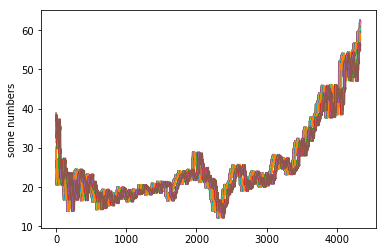

In [39]:
import numpy as np
msft_list_0 = msft.values
timeDelay = [1,2,3,4,5,10,13,15,17,25,30,35,70,80,90,100]
msft_list = []
for index, value in enumerate(timeDelay):
    msft_list_i = np.concatenate((np.zeros(value) , msft_list_0[:-value]))
    msft_list.append(msft_list_i[100:])
print np.shape(msft_list)
msft_list_0 = msft_list_0[100:]

msft_V = []
msft_V1 = msft_list_0 - msft_list[0]
msft_V1_5 = (msft_list[0] - msft_list[4])/4.0
msft_V5_10 = (msft_list[4] - msft_list[5])/5.0
msft_V10_30 = (msft_list[6] - msft_list[10])/20.0
msft_V30_70 = (msft_list[10] - msft_list[12])/40.0
msft_V70_100 = (msft_list[12] - msft_list[15])/30.0

msft_A1 = (msft_V1 - msft_V1_5)/3.0
msft_A2 = (msft_V1_5 - msft_V5_10)/5.0
msft_A3 = (msft_V5_10 - msft_V10_30)/20.0
msft_A4 = (msft_V10_30 - msft_V30_70)/30.0
msft_A5 = (msft_V30_70 - msft_V70_100)/30.0


for i in range(0,16):
    plt.plot(msft_list[i])
plt.ylabel('some numbers')
plt.show()

In [24]:
import pymc3 as pm

with pm.Model() as model:
    std = pm.Uniform("std", 0, 100)
    
    alpha = pm.Normal("alpha", mu=0, sd=100)
    beta_0 = pm.Normal("beta_0", mu=0, sd=100)
    beta_1 = pm.Normal("beta_1", mu=0, sd=100)
    beta_2 = pm.Normal("beta_2", mu=0, sd=100)
    beta_3 = pm.Normal("beta_3", mu=0, sd=100)
    beta_4 = pm.Normal("beta_4", mu=0, sd=100)
    beta_5 = pm.Normal("beta_5", mu=0, sd=100)
    beta_6 = pm.Normal("beta_6", mu=0, sd=100)
    beta_7 = pm.Normal("beta_7", mu=0, sd=100)
    beta_8 = pm.Normal("beta_8", mu=0, sd=100)
    beta_9 = pm.Normal("beta_9", mu=0, sd=100)
    beta_10 = pm.Normal("beta_10", mu=0, sd=100)
    beta_11 = pm.Normal("beta_11", mu=0, sd=100)
#     beta_12 = pm.Normal("beta_12", mu=0, sd=100)
#     beta_13 = pm.Normal("beta_13", mu=0, sd=100)
#     beta_14 = pm.Normal("beta_14", mu=0, sd=100)
#     beta_15 = pm.Normal("beta_15", mu=0, sd=100)
#     beta_16 = pm.Normal("beta_16", mu=0, sd=100)
    
    mean = pm.Deterministic("mean", alpha + beta_0*msft_list[0] + beta_1*msft_list[1] +beta_2*msft_list[2] + beta_3*msft_list[3] \
                           + beta_4*msft_list[4] + beta_5*msft_list[5] + beta_6*msft_list[6] + beta_7*msft_list[7] +beta_8*msft_list[8] + beta_9*msft_list[9] \
                           + beta_10*msft_list[10] + beta_11*msft_list[11])
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=msft_list_0)
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[90000:]  

100%|██████████| 100000/100000 [05:56<00:00, 280.17it/s]


In [25]:
pm.plots.traceplot(trace=burned_trace, varnames=["std", "beta_0","beta_1","beta_2","beta_3","beta_4","beta_5","beta_6","beta_7","beta_8","beta_9","beta_10","beta_11", "alpha"])
pm.plot_posterior(trace=burned_trace, varnames=["std", "beta_0","beta_1","beta_2","beta_3","beta_4","beta_5","beta_6","beta_7","beta_8","beta_9","beta_10","beta_11", "alpha"], kde_plot=True);

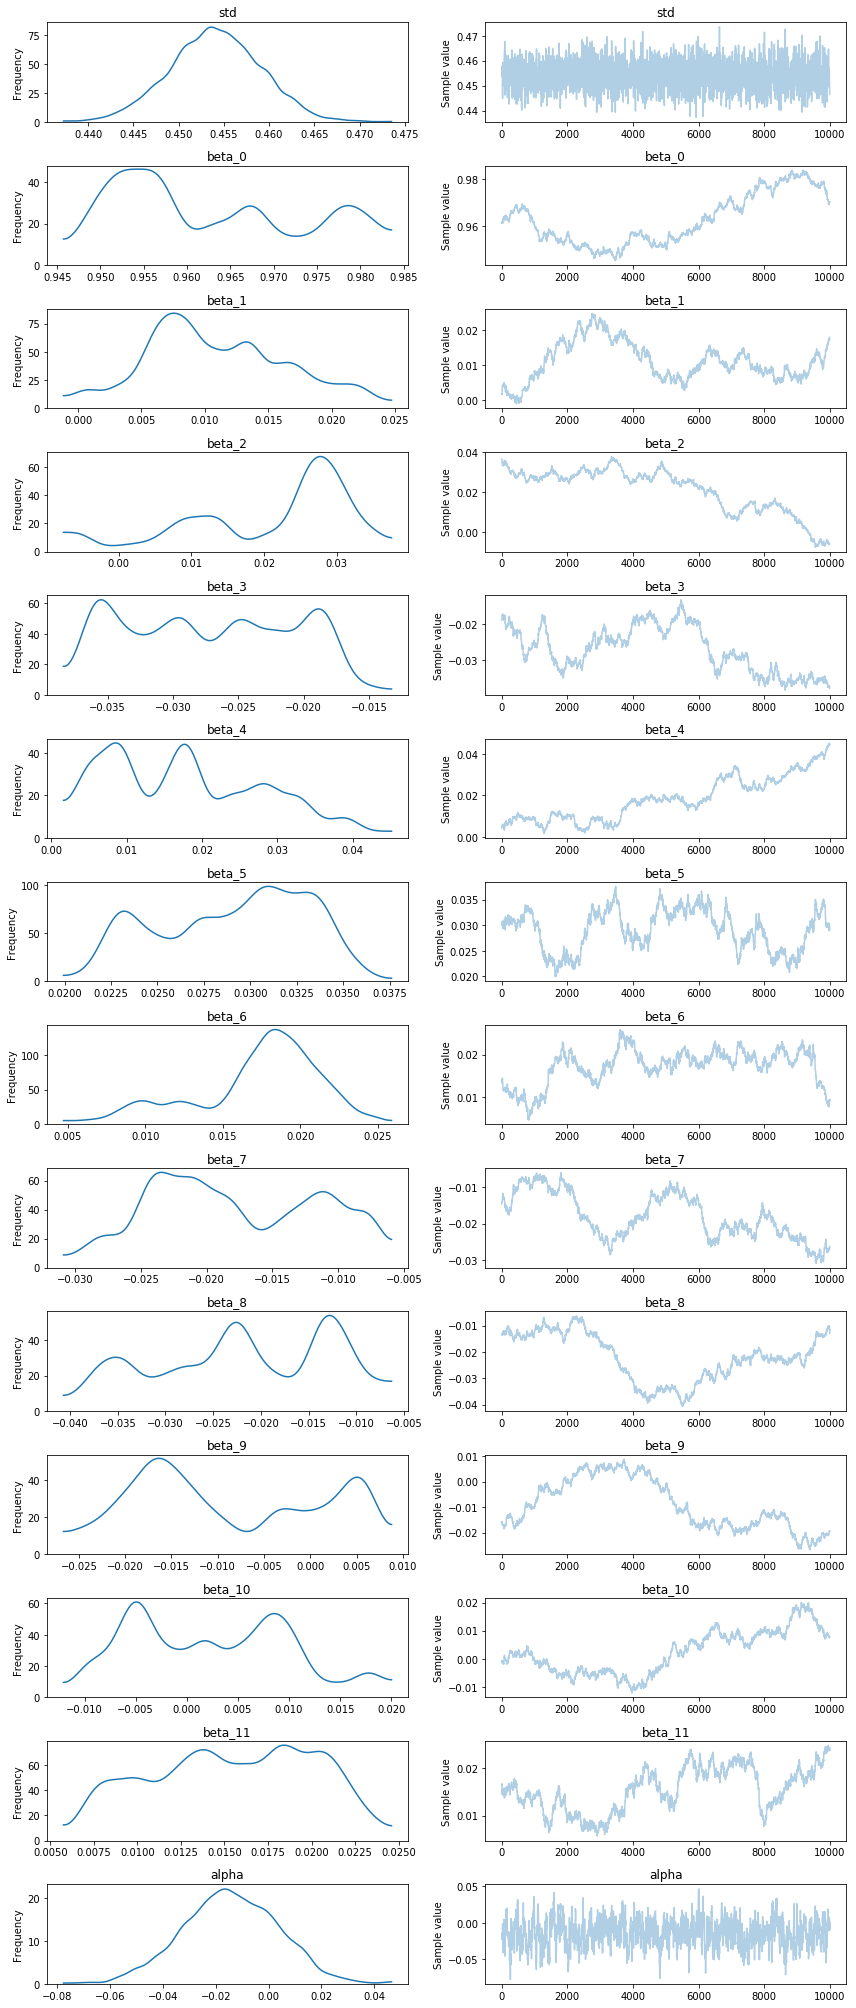

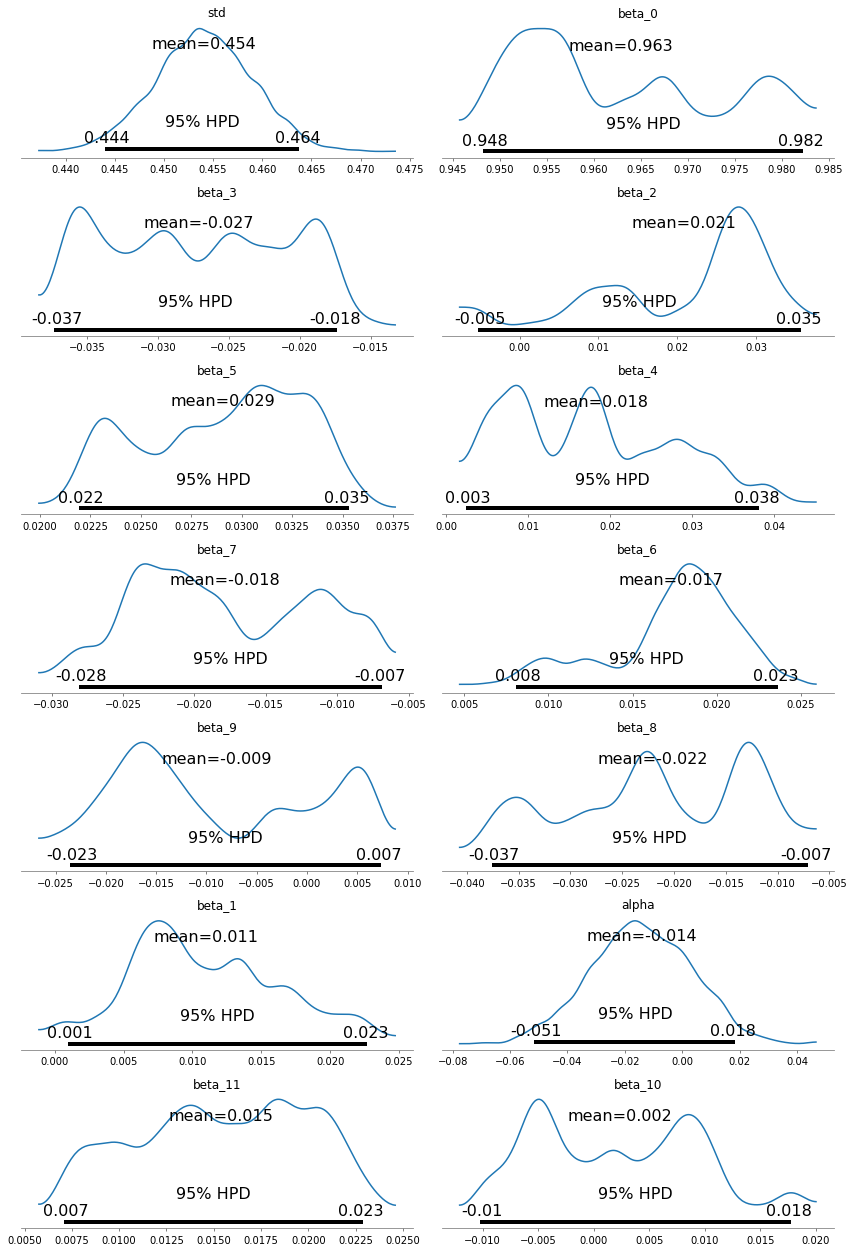

In [26]:
plt.show()

In [27]:
import pymc3 as pm

with pm.Model() as model:
    std = pm.Uniform("std", 0, 100)
    
    alpha = pm.Normal("alpha", mu=0, sd=100)
    beta_0 = pm.Normal("beta_0", mu=0, sd=100)
    beta_1 = pm.Normal("beta_1", mu=0, sd=100)
    beta_2 = pm.Normal("beta_2", mu=0, sd=100)
    beta_3 = pm.Normal("beta_3", mu=0, sd=100)
    beta_4 = pm.Normal("beta_4", mu=0, sd=100)
    beta_5 = pm.Normal("beta_5", mu=0, sd=100)
    beta_6 = pm.Normal("beta_6", mu=0, sd=100)
    beta_7 = pm.Normal("beta_7", mu=0, sd=100)
    beta_8 = pm.Normal("beta_8", mu=0, sd=100)
    beta_9 = pm.Normal("beta_9", mu=0, sd=100)
    beta_10 = pm.Normal("beta_10", mu=0, sd=100)
    beta_11 = pm.Normal("beta_11", mu=0, sd=100)
#     beta_A = pm.Normal("beta_A", mu=0, sd=100)
#     beta_V = pm.Normal("beta_V", mu=0, sd=100)
    
    value = pm.Deterministic("value", alpha + msft_list[5]);
    A = pm.Deterministic("A",beta_1* msft_A1 + beta_2* msft_A2 + beta_3* msft_A3 + beta_4* msft_A4 + beta_5* msft_A5)
    V = pm.Deterministic("V",A + beta_6* msft_V1 + beta_7* msft_V1_5 + beta_8* msft_V5_10 + beta_9* msft_V10_30 + beta_10* msft_V30_70 + beta_11* msft_V70_100)
    
    mean = pm.Deterministic("mean", value + V)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=msft_list_0)
    
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[90000:]  

100%|██████████| 100000/100000 [06:32<00:00, 254.59it/s]


In [28]:
pm.plots.traceplot(trace=burned_trace, varnames=["std", "beta_0","beta_1","beta_2","beta_3","beta_4","beta_5","beta_6","beta_7","beta_8","beta_9","beta_10","beta_11","alpha"])
pm.plot_posterior(trace=burned_trace, varnames=["std", "beta_0","beta_1","beta_2","beta_3","beta_4","beta_5","beta_6","beta_7","beta_8","beta_9","beta_10","beta_11","alpha"], kde_plot=True);

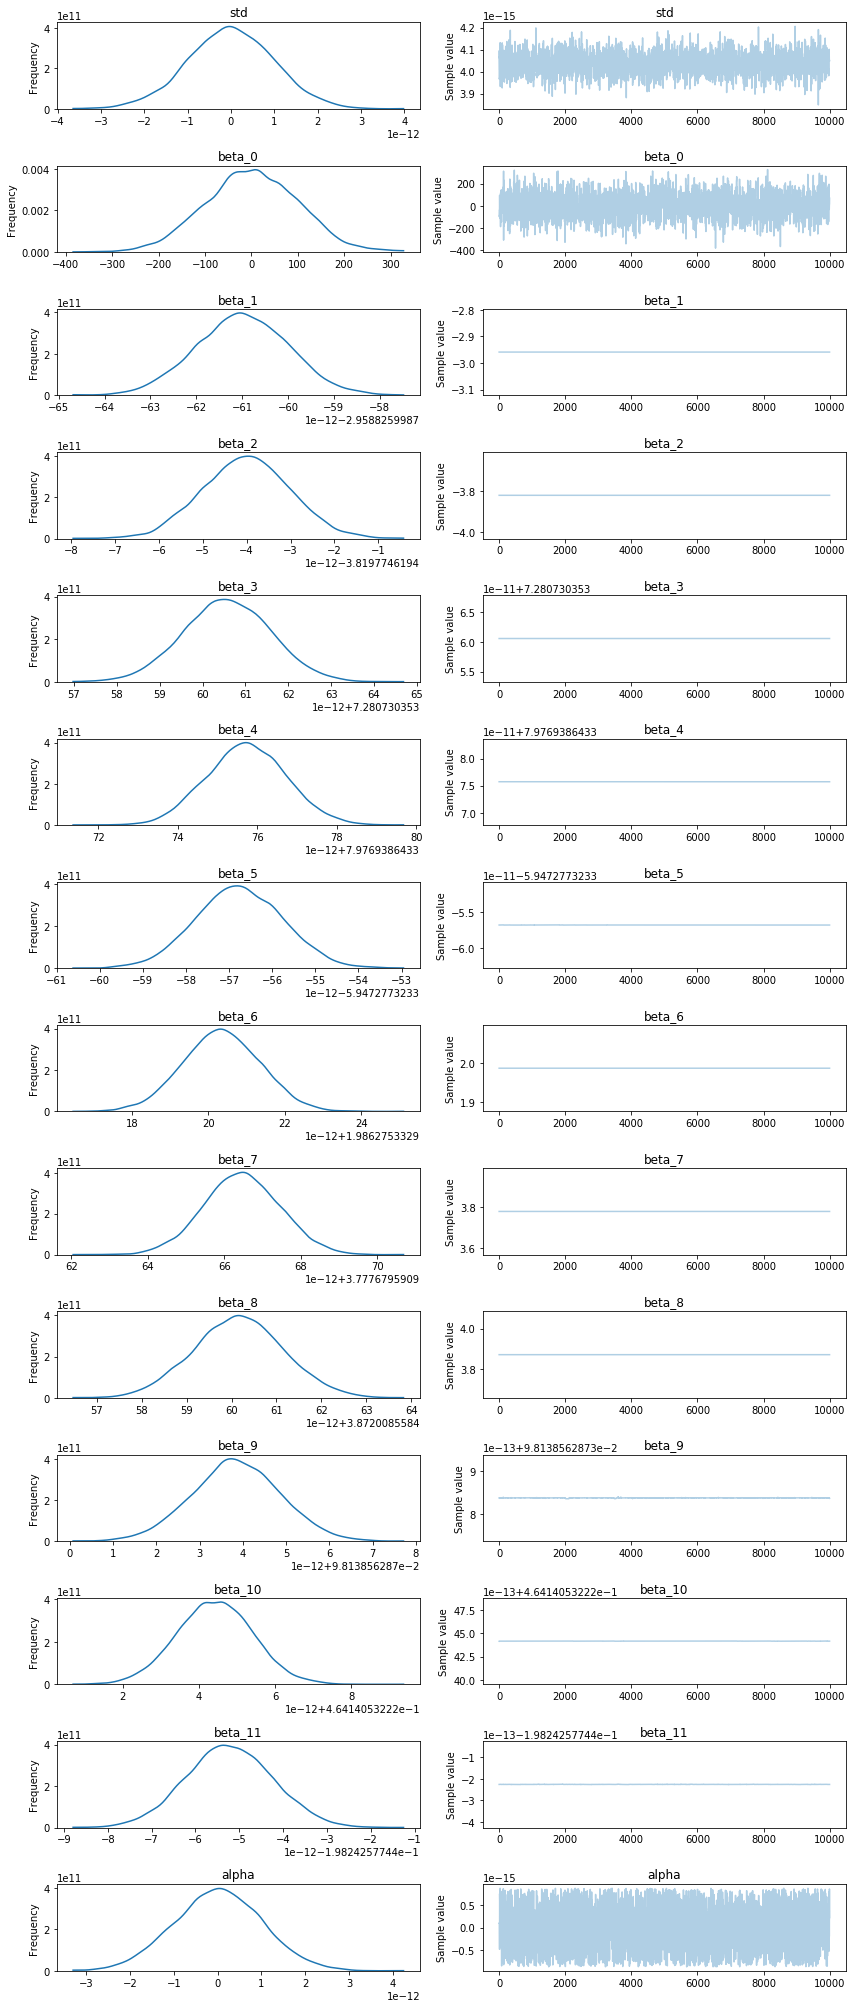

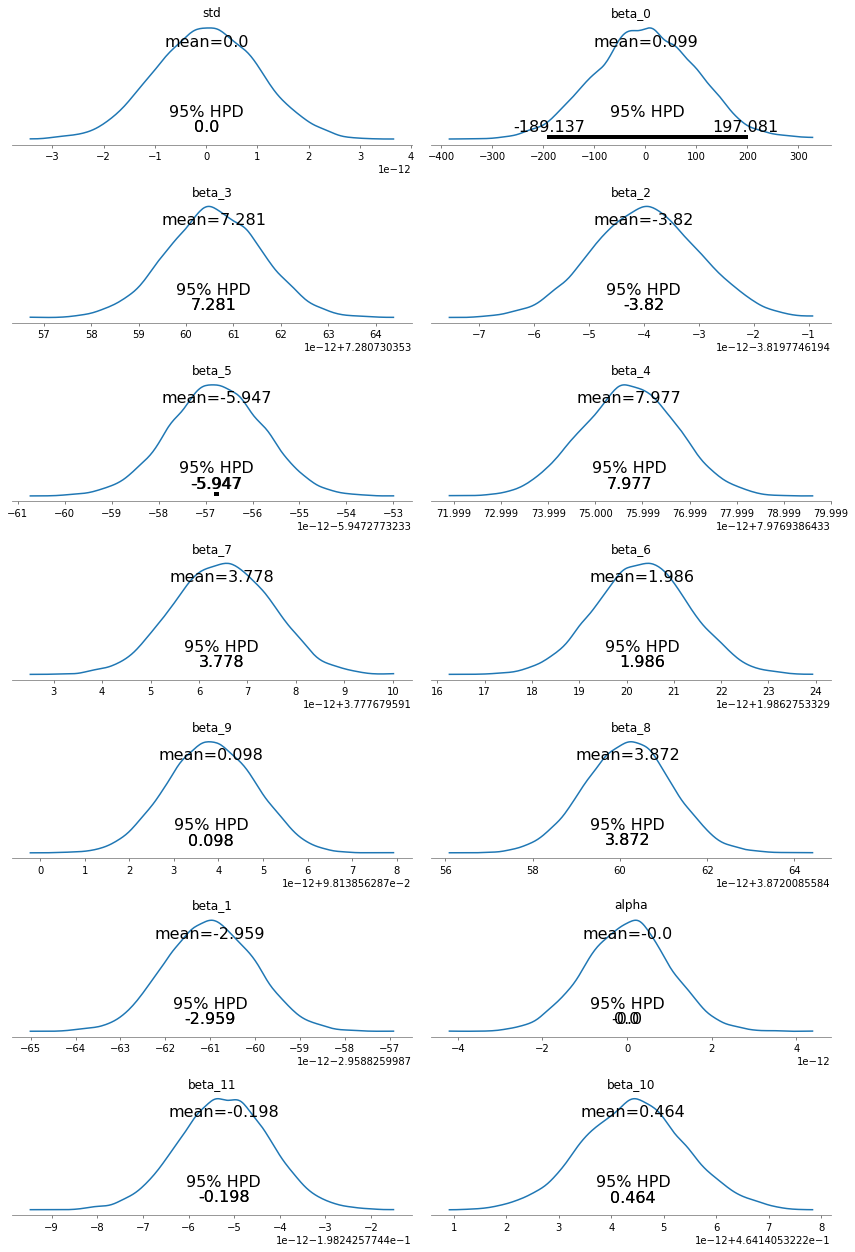

In [29]:
plt.show()

In [30]:
d={}
for x in range(0,12):
        d["trace_beta{0}".format(x)]=burned_trace["beta_{0}".format(x)]
    

In [34]:
A = d["trace_beta1"][0]* msft_A1 + d["trace_beta2"][0]* msft_A2 + d["trace_beta3"][0]* msft_A3 + d["trace_beta4"][0]* msft_A4 + d["trace_beta5"][0]* msft_A5
V = A + d["trace_beta6"][0]* msft_V1 + d["trace_beta7"][0]* msft_V1_5 + d["trace_beta8"][0]* msft_V5_10 + d["trace_beta9"][0]* msft_V10_30 + d["trace_beta10"][0]* msft_V30_70 + d["trace_beta11"][0]* msft_V70_100
